In [1]:
import numpy as np
from matplotlib import pyplot as pl

In [333]:
transit_durations = np.loadtxt('Datasets/non-ringed-transit-durations.txt')
transit_masks = np.loadtxt('Datasets/non-ringed-transit-masks.txt', int).astype(bool)
periods = np.loadtxt('Datasets/non-ringed-periods.txt', dtype=np.float64)/60./60./24. #unit: Days
IDS = np.loadtxt('Datasets/non-ringed-ids.txt', str)
longest_transit = max(transit_durations)
longest_transit_indices = np.where(transit_durations == longest_transit)[0]
longest_transit_idx = longest_transit_indices[np.argmax(periods[longest_transit_indices])]
shortest_transit = min(transit_durations[transit_masks])
shortest_transit_indices = np.where(transit_durations == shortest_transit)[0]
shortest_transit_idx = shortest_transit_indices[np.argmin(periods[shortest_transit_indices])]
longest_transit_period = periods[longest_transit_idx]
shortest_transit_period = periods[shortest_transit_idx]
longest_transit_ID = IDS[longest_transit_idx]
shortest_transit_ID = IDS[shortest_transit_idx]


/tmp/ipykernel_1389132/295915858.py:2: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  transit_masks = np.loadtxt('Datasets/non-ringed-transit-masks.txt', int).astype(bool)


In [127]:
periods[0]

1046.8540603730291

In [128]:
longest_transit_file_number, longest_transit_file_idx = int(longest_transit_idx/1250), (longest_transit_idx%1250)
shortest_transit_file_number, shortest_transit_file_idx = int(shortest_transit_idx/1250), (shortest_transit_idx%1250)

In [129]:
print('Longest - File number: ', longest_transit_file_number, ' - File index: ', longest_transit_file_idx)
print('Shortest - File number: ', shortest_transit_file_number, ' - File index: ', shortest_transit_file_idx)

Longest - File number:  58  - File index:  1001
Shortest - File number:  62  - File index:  562


In [130]:
longest_transit_lc = np.loadtxt('Datasets/curves_1_58.txt', skiprows=longest_transit_file_idx, max_rows=1)
shortest_transit_lc = np.loadtxt('Datasets/curves_1_62.txt', skiprows=shortest_transit_file_idx, max_rows=1)

In [313]:
t = np.linspace(0, (longest_transit_lc.shape[0]-1), longest_transit_lc.shape[0])/48. #unit: Days

In [314]:
from scipy import signal as signal

In [335]:
longest_transit_period

296.94362623863225

In [515]:
w1 = np.linspace(np.pi*2/29.25, np.pi*2/30, 10000)
pgram1 = signal.lombscargle(t, longest_transit_lc, w1, normalize=True, precenter=True)

In [497]:
w2 = np.linspace(np.pi*2/3.8, np.pi*2/4.2, 10000)
pgram2 = signal.lombscargle(t, shortest_transit_lc, w2, normalize=True, precenter=True)

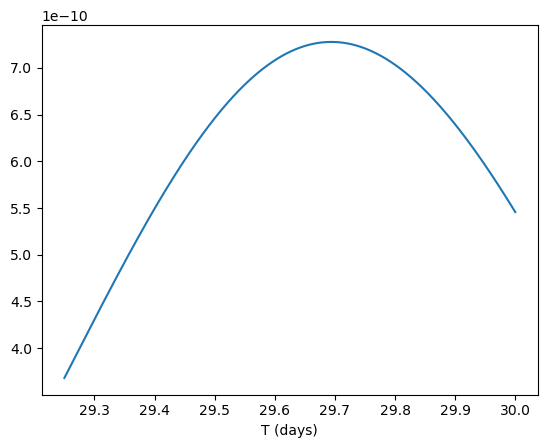

In [516]:
pl.plot(2*np.pi/w1, pgram1)
pl.xlabel('T (days)')
pl.show()

In [517]:
longest_transit_empirical_period = (2*np.pi/w1)[np.argmax(pgram1)]*10

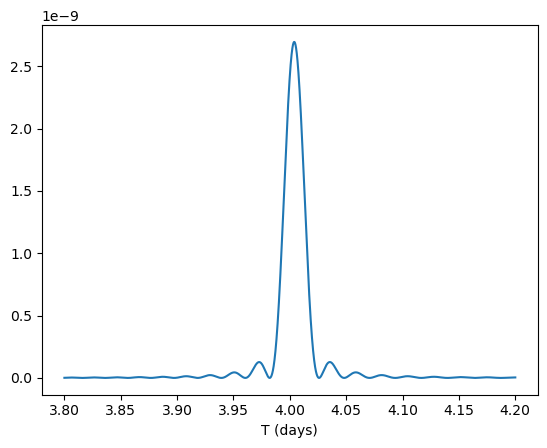

In [436]:
pl.plot(2*np.pi/w2, pgram2)
pl.xlabel('T (days)')
pl.show()

In [474]:
shortest_transit_empirical_period = (2*np.pi/w2)[np.argmax(pgram2)]

In [518]:
print('Long transit: Model T: ', longest_transit_period, '- Empirical T: ', longest_transit_empirical_period)
print('Short transit: Model T: ', shortest_transit_period, '- Empirical T: ', shortest_transit_empirical_period)

Long transit: Model T:  296.94362623863225 - Empirical T:  296.9396923701711
Short transit: Model T:  4.003918147844058 - Empirical T:  4.00387481371088


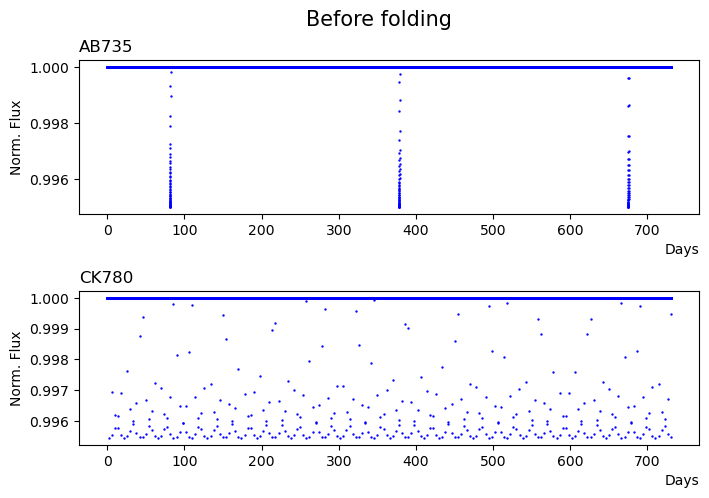

In [501]:
fig, axes = pl.subplots(2, 1)
axes[0].scatter(t, longest_transit_lc, s=0.5, c='b')
axes[0].set_xlabel('Days', loc='right')
axes[0].set_ylabel('Norm. Flux')
axes[0].set_title(longest_transit_ID, loc='left')
axes[1].scatter(t, shortest_transit_lc, s=0.5, c='b')
axes[1].set_xlabel('Days', loc='right')
axes[1].set_ylabel('Norm. Flux')
axes[1].set_title(shortest_transit_ID, loc='left')

fig.set_size_inches(8, 5)
fig.suptitle('Before folding', fontsize=15)
pl.subplots_adjust(hspace=0.5)
fig.show()

In [477]:
def plotting_routine(x1, x2, y1, y2, xlabel1, xlabel2, id1, id2, title):
    fig, axes = pl.subplots(2, 1)
    axes[0].scatter(x1, y1, s=0.5, c='b', label='N = '+str(len(x1)))
    axes[0].set_xlabel(xlabel1, loc='right')
    axes[0].set_ylabel('Norm. Flux')
    axes[0].set_title(id1, loc='left')
    axes[0].legend()
    axes[1].scatter(x2, y2, s=0.5, c='b', label='N = '+str(len(x2)))
    axes[1].set_xlabel(xlabel2, loc='right')
    axes[1].set_ylabel('Norm. Flux')
    axes[1].set_title(id2, loc='left')
    axes[1].legend()
    
    
    fig.set_size_inches(8, 5)
    fig.suptitle(title, fontsize=15)
    pl.subplots_adjust(hspace=0.5)
    fig.show()

In [519]:
#longest_transit_folded_t = t%longest_transit_period
#shortest_transit_folded_t = t%shortest_transit_period

longest_transit_folded_t = divmod(t, longest_transit_empirical_period)[1]
shortest_transit_folded_t = divmod(t, shortest_transit_empirical_period)[1]

In [520]:
longest_transit_folded_t

array([0.00000000e+00, 2.08333333e-02, 4.16666667e-02, ...,
       1.36558115e+02, 1.36578949e+02, 1.36599782e+02])

In [521]:
longest_transit_sorted_idx = np.argsort(longest_transit_folded_t)
shortest_transit_sorted_idx = np.argsort(shortest_transit_folded_t)

sorted_longest_transit_folded_t = longest_transit_folded_t[longest_transit_sorted_idx]
sorted_shortest_transit_folded_t = shortest_transit_folded_t[shortest_transit_sorted_idx]

sorted_longest_transit_lc = longest_transit_lc[longest_transit_sorted_idx]
sorted_shortest_transit_lc = shortest_transit_lc[shortest_transit_sorted_idx]

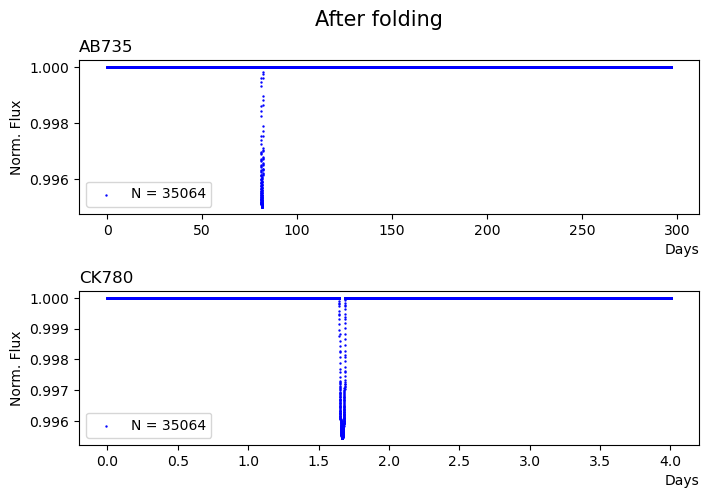

In [522]:
plotting_routine(sorted_longest_transit_folded_t, sorted_shortest_transit_folded_t, sorted_longest_transit_lc, sorted_shortest_transit_lc, 'Days', 'Days', longest_transit_ID, shortest_transit_ID, 'After folding')

In [523]:
both_lcs = np.vstack((sorted_longest_transit_lc, sorted_shortest_transit_lc))

In [524]:
from LCUtils import get_transit_durations

In [525]:
starts = get_transit_durations(both_lcs, 60*30)[2]
ends = get_transit_durations(both_lcs, 60*30)[3]

In [526]:
longest_transit_start_hour = sorted_longest_transit_folded_t[int(starts[0])]*24
longest_start_idx = np.where((sorted_longest_transit_folded_t*24-longest_transit_start_hour)>-1.5)[0][0]

shortest_transit_start_hour = sorted_shortest_transit_folded_t[int(starts[1])]*24
shortest_start_idx = np.where((sorted_shortest_transit_folded_t*24-shortest_transit_start_hour)>-1.5)[0][0]



In [527]:
longest_end_idx = np.where((sorted_longest_transit_folded_t*24-(longest_transit_start_hour+longest_transit))>1.5)[0][0]
shortest_end_idx = np.where((sorted_shortest_transit_folded_t*24-(shortest_transit_start_hour+shortest_transit))>1.5)[0][0]


In [528]:
sorted_longest_transit_cropped_lc = sorted_longest_transit_lc[longest_start_idx:longest_end_idx]
sorted_shortest_transit_cropped_lc = sorted_shortest_transit_lc[shortest_start_idx:shortest_end_idx+250]
sorted_longest_transit_cropped_folded_t = sorted_longest_transit_folded_t[longest_start_idx:longest_end_idx]
sorted_shortest_transit_cropped_folded_t = sorted_shortest_transit_folded_t[shortest_start_idx:shortest_end_idx+250]

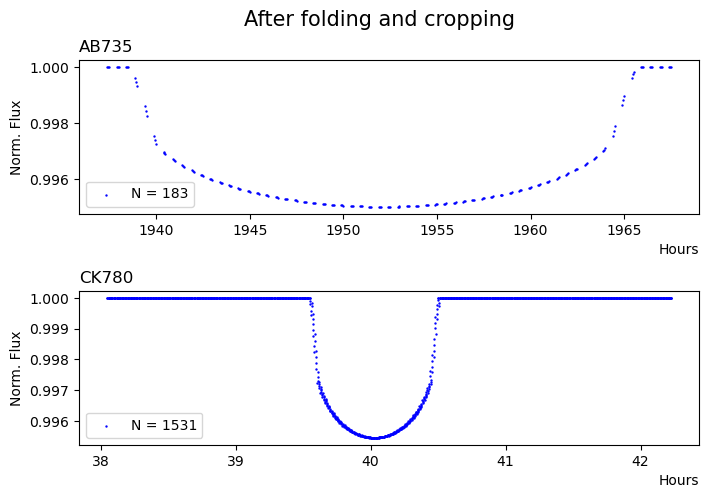

In [529]:
plotting_routine(sorted_longest_transit_cropped_folded_t*24, sorted_shortest_transit_cropped_folded_t*24, sorted_longest_transit_cropped_lc, sorted_shortest_transit_cropped_lc, 'Hours', 'Hours', longest_transit_ID, shortest_transit_ID, 'After folding and cropping')